# **Final Project - Business Decision Modeling - OPIM 5641**


---


To,

Dr. Dave Wanik - Dept. of Operations and Information Management - University of Connecticut



---

By Group 3,


*   **Priyanka Garg (PRG23005)**
*   **Yash Parihar (YAP23003)**



---
By submitting this project, I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.


---







# **a. Environment Setup**

## a.1. Setting up for Google Colab

In [1]:
# This block ensures all necessary libraries are installed when running the code on Google Colab.
# It checks if the current environment is Google Colab and installs essential packages.

%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

## a.2. Importing Standard Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Installing additional libraries needed for optimization
!pip install pyomo
from pyomo.environ import *

## a.3. Installing Stock Data Libraries

In [3]:
# Stock-specific packages/ libraries for downloading data from Yahoo Finance
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=e7463e4e679d6302648e7bff0494e2e5ed7bd03fb05c13bd42c0a63822fc2b3c
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
Warning - Certain functionality 
             requires requests_html, which is not installed.
             
       

# **1. Data Preprocessing & EDA**

## 1.1. Defining a list of stock tickers

In [4]:
# These represent the healthcare, communication, and real estate sectors stocks.
tickers_list = ['CVS','ABT','JNJ','T','NFLX','EA','OHI','PK','EXR']

# CVS represents CVS Health Corporation
# ABT represents Abbott Laboratories
# JNJ represents Johnson & Johnson
# T represents AT&T Inc.
# NFLX represents Netflix, Inc.
# EA represents Electronic Arts Inc.
# OHI represents Omega Healthcare Investors
# PK represents Park Hotels & Resorts Inc.
# EXR represents Extra Space Storage Inc.

## 1.2. Downloading Historical Stock Price Data

In [5]:
# Pull historical price data for each stocks with daily data from 2017 to 2022
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2022',interval='1d') for ticker in tickers_list}

In [6]:
# Verify the completeness of the data for each stock by checking the date range.
for ticker in tickers_list:
    print(f"{ticker}: Data from {dow_prices[ticker].index.min()} to {dow_prices[ticker].index.max()}")    # This loop goes through each ticker and prints the earliest and latest dates available in the data


CVS: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
ABT: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
JNJ: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
T: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
NFLX: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
EA: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
OHI: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00
PK: Data from 2017-01-04 00:00:00 to 2022-12-30 00:00:00
EXR: Data from 2017-01-03 00:00:00 to 2022-12-30 00:00:00


In [7]:
# Preview the stock data for a quick check
dow_prices

{'CVS':                  open       high        low      close   adjclose   volume  \
 2017-01-03  79.580002  80.449997  78.970001  80.349998  63.284073  5922800   
 2017-01-04  80.339996  80.419998  79.440002  79.750000  62.811531  7101800   
 2017-01-05  79.849998  81.519997  78.800003  81.419998  64.126793  8805400   
 2017-01-06  81.410004  82.459999  80.940002  82.199997  64.741165  7087100   
 2017-01-09  82.199997  82.379997  81.160004  81.699997  64.347343  6847600   
 ...               ...        ...        ...        ...        ...      ...   
 2022-12-23  93.309998  94.209999  93.070000  93.559998  86.994087  7307000   
 2022-12-27  93.110001  93.320000  92.129997  93.019997  86.491989  3977400   
 2022-12-28  93.400002  93.690002  92.580002  92.760002  86.250237  3807000   
 2022-12-29  93.209999  93.750000  92.919998  93.449997  86.891808  3297200   
 2022-12-30  93.250000  93.449997  92.489998  93.190002  86.650063  3568500   
 
            ticker  
 2017-01-03    CVS  
 

## 1.3. Combining Adjusted Closing Prices for All Stocks

In [8]:
# Extract the adjusted closing price (Adj Close) for each stock
prep_data = pd.DataFrame(dow_prices['CVS']['adjclose']).rename(columns = {"adjclose":"CVS"})   # Renames the column from 'adjclose' to 'CVS' for easier identification

# Loop through the rest of the tickers in the list (excluding CVS) to add their Adjusted Closing Prices
for i in tickers_list[1:]:
    # For each ticker, extract the 'adjclose' column and add it as a new column in `prep_data`
    prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

# Display the combined DataFrame with Adjusted Closing Prices for all tickers
prep_data

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
2017-01-03,63.284073,33.788063,93.064125,17.791142,127.489998,77.345070,16.535397,NaN,58.194344
2017-01-04,62.811531,34.056297,92.911476,17.687752,129.410004,78.771416,16.695822,16.376873,58.504002
2017-01-05,64.126793,34.350479,93.883575,17.638121,131.809998,77.139915,16.861441,15.555292,59.266834
2017-01-06,64.741165,35.284946,93.433693,17.352039,131.070007,77.188782,16.908016,15.812725,59.818188
2017-01-09,64.347343,35.250340,93.417603,17.133673,130.949997,76.827278,16.768288,16.064671,59.108257
...,...,...,...,...,...,...,...,...,...
2022-12-23,86.994087,103.983215,166.966949,16.156910,294.959991,120.135635,23.991911,9.429042,136.339874
2022-12-27,86.491989,104.358086,166.919907,16.289274,284.170013,119.453430,23.839741,9.526167,136.924545
2022-12-28,86.250237,103.646790,166.195526,16.077496,276.880005,118.187912,23.391687,9.299544,134.873550
2022-12-29,86.891808,106.030563,167.042221,16.280449,291.119995,120.807945,23.577673,9.647037,138.288757


## 1.4. Checking for Missing Data


In [9]:
# Check for missing data across all tickers
print(prep_data.isnull().sum())  # Shows the count of missing values per ticker

# Check the shape of the dataframe (rows and columns)
print(prep_data.shape)

CVS     0
ABT     0
JNJ     0
T       0
NFLX    0
EA      0
OHI     0
PK      1
EXR     0
dtype: int64
(1510, 9)


## 1.5. Creating Return Features for Each Ticker

In [10]:
# Create a new DataFrame to store the daily returns for each stock
return_data = pd.DataFrame()

# Loop through each ticker and calculate the daily return as the percentage change (i.e. current and previous day's adjusted close price)
for i in tickers_list:
    return_data[i] = prep_data[i].pct_change()

# Check the first few rows of the dataframe
return_data.head()

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.007467,0.007939,-0.001640,-0.005811,0.015060,0.018441,0.009702,NaN,0.005321
2017-01-05,0.020940,0.008638,0.010463,-0.002806,0.018546,-0.020712,0.009920,-0.050167,0.013039
2017-01-06,0.009581,0.027204,-0.004792,-0.016219,-0.005614,0.000633,0.002762,0.016550,0.009303
2017-01-09,-0.006083,-0.000981,-0.000172,-0.012584,-0.000916,-0.004683,-0.008264,0.015933,-0.011868


## 1.6. Dropping rows with NaN values

In [11]:
# Drop rows with NaN values (Note: first row of data will have NaNs after pct_change)
return_data.dropna(inplace=True)

# View the return data
return_data       # This data gives us 1508 rows after dropping 2 rows (First row and second row(PK))

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
2017-01-05,0.020940,0.008638,0.010463,-0.002806,0.018546,-0.020712,0.009920,-0.050167,0.013039
2017-01-06,0.009581,0.027204,-0.004792,-0.016219,-0.005614,0.000633,0.002762,0.016550,0.009303
2017-01-09,-0.006083,-0.000981,-0.000172,-0.012584,-0.000916,-0.004683,-0.008264,0.015933,-0.011868
2017-01-10,0.011873,0.013500,-0.001032,0.000245,-0.008095,0.002671,-0.012346,-0.003750,-0.020828
2017-01-11,0.001210,0.001341,-0.012311,-0.004901,0.004696,0.002156,-0.003750,0.016085,-0.025838
...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001713,0.001389,0.002542,0.002189,-0.009370,0.000741,0.009964,0.038324,0.005682
2022-12-27,-0.005772,0.003605,-0.000282,0.008192,-0.036581,-0.005679,-0.006343,0.010301,0.004288
2022-12-28,-0.002795,-0.006816,-0.004340,-0.013001,-0.025654,-0.010594,-0.018794,-0.023789,-0.014979
2022-12-29,0.007438,0.022999,0.005095,0.012623,0.051430,0.022168,0.007951,0.037367,0.025322


## 1.8.Time Series Visualisation for each sector

### 1.8.1 Healthcare Sector

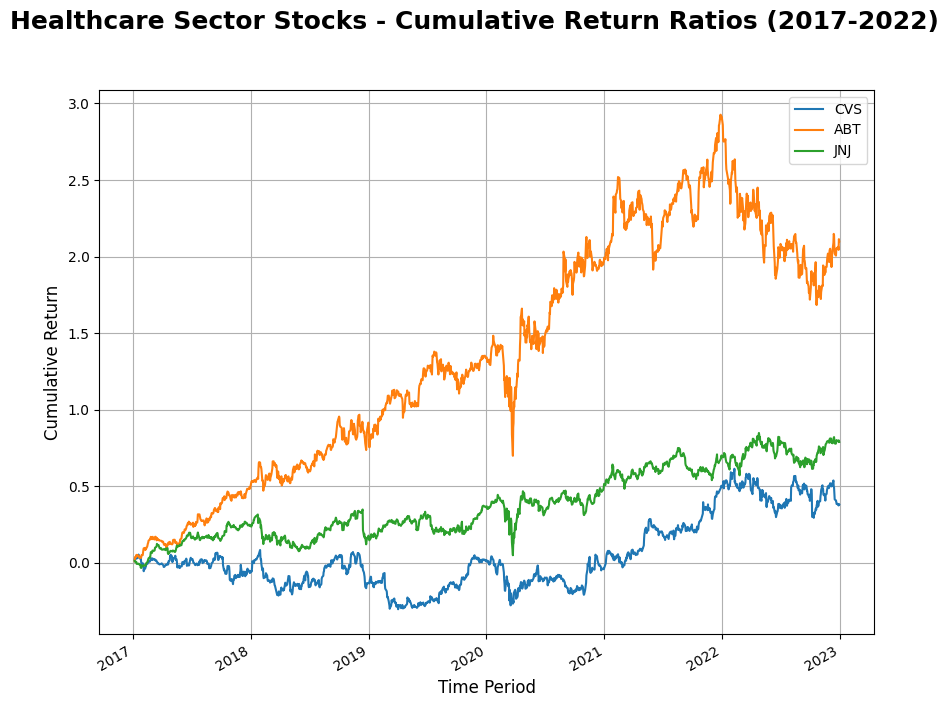

In [12]:
# Cumulative return calculation for Healthcare sector stocks
cumulative_return = (1 + return_data[['CVS', 'ABT', 'JNJ']]).cumprod() - 1

# Plot cumulative return
cumulative_return.plot(grid=True, figsize=(10, 8))
plt.suptitle("Healthcare Sector Stocks - Cumulative Return Ratios (2017-2022)", fontsize=18, fontweight='bold')
plt.xlabel("Time Period", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.show()

# Observations:
# ABT exhibited strong growth, recovering quickly after a sharp dip in early 2020 due to the COVID-19 pandemic, making it a high-growth and resilient option.
# JNJ demonstrated steady growth with limited fluctuations, indicating a consistent and reliable investment.
# CVS showed slower growth, and was a underperforming stock in comparison.


### 1.8.2 Communication Services Sector

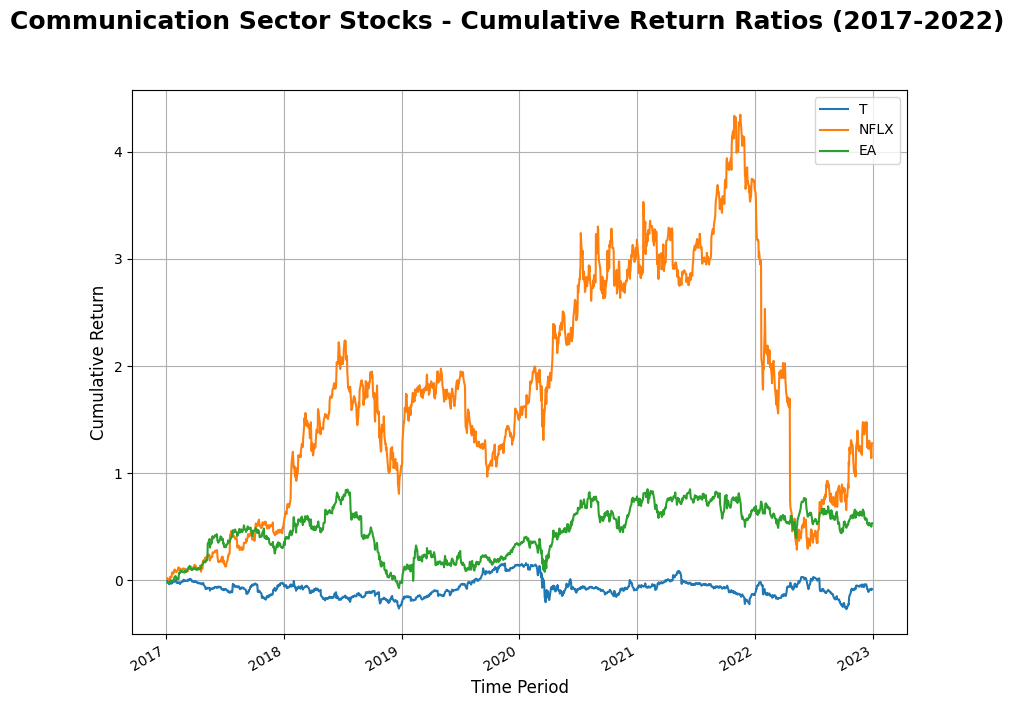

In [13]:
# Cumulative return calculation for Communication sector stocks
cumulative_return = (1 + return_data[['T', 'NFLX', 'EA']]).cumprod() - 1

# Plot cumulative return
cumulative_return.plot(grid=True, figsize=(10, 8))
plt.suptitle("Communication Sector Stocks - Cumulative Return Ratios (2017-2022)", fontsize=18, fontweight='bold')
plt.xlabel("Time Period", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.show()

# Observations:
# NFLX exhibited strong growth but with the highest volatility, making it both a high-risk and high-reward option.
# EA demonstrated steady growth with limited volatility, suggesting a safer, more consistent investment.
# T showed slow growth and minimal volatility, indicating it was a relatively stable but underperforming stock in comparison.


### 1.8.3 Real Estate Sector

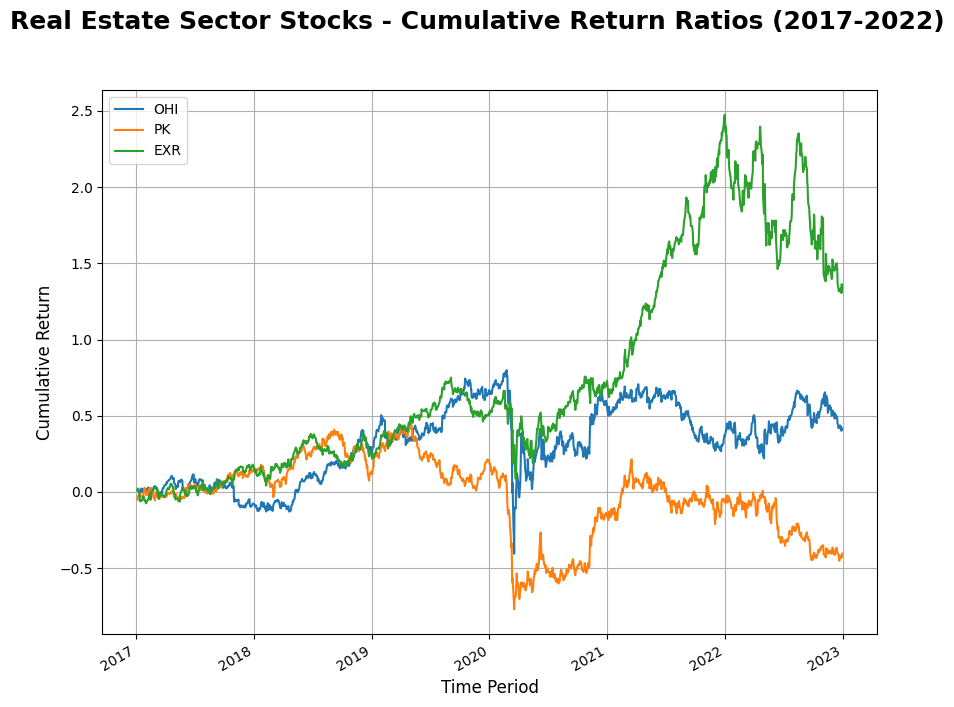

In [14]:
# Cumulative return calculation for Real Estate sector stocks
cumulative_return = (1 + return_data[['OHI', 'PK', 'EXR']]).cumprod() - 1

# Plot cumulative return
cumulative_return.plot(grid=True, figsize=(10, 8))
plt.suptitle("Real Estate Sector Stocks - Cumulative Return Ratios (2017-2022)", fontsize=18, fontweight='bold')
plt.xlabel("Time Period", fontsize=12)
plt.ylabel("Cumulative Return", fontsize=12)
plt.show()

# Observations:
# EXR showed the highest growth, peaking at a cumulative return of around 2.5 by mid-2022, despite notable fluctuations.
# OHI displayed moderate growth, maintaining a cumulative return of around 0.5 by 2022, with relatively stable trends.
# PK experienced the lowest performance, with a cumulative return remaining below zero for most of the period, indicating consistent underperformance.


## 1.9.Saving Data to a CSV File

In [15]:
# Transfering the data to a CSV file
return_data.to_csv('mydata.csv')

In [16]:
# Load stock data from the CSV file
df = pd.read_csv('mydata.csv')

# Check the first few rows of the dataframe
df.head()

,Unnamed: 0,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
0,2017-01-05,0.020940,0.008638,0.010463,-0.002806,0.018546,-0.020712,0.009920,-0.050167,0.013039
1,2017-01-06,0.009581,0.027204,-0.004792,-0.016219,-0.005614,0.000633,0.002762,0.016550,0.009303
2,2017-01-09,-0.006083,-0.000981,-0.000172,-0.012584,-0.000916,-0.004683,-0.008264,0.015933,-0.011868
3,2017-01-10,0.011873,0.013500,-0.001032,0.000245,-0.008095,0.002671,-0.012346,-0.003750,-0.020828
4,2017-01-11,0.001210,0.001341,-0.012311,-0.004901,0.004696,0.002156,-0.003750,0.016085,-0.025838


## 1.10 Removing Unnecessary Columns

In [17]:
# Clean the data by removing unnecessary column
# The data is already in order, so the timestamp is not needed for analysis
del df['Unnamed: 0']

# Check the first few rows of the dataframe
df.head()

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
0,0.020940,0.008638,0.010463,-0.002806,0.018546,-0.020712,0.009920,-0.050167,0.013039
1,0.009581,0.027204,-0.004792,-0.016219,-0.005614,0.000633,0.002762,0.016550,0.009303
2,-0.006083,-0.000981,-0.000172,-0.012584,-0.000916,-0.004683,-0.008264,0.015933,-0.011868
3,0.011873,0.013500,-0.001032,0.000245,-0.008095,0.002671,-0.012346,-0.003750,-0.020828
4,0.001210,0.001341,-0.012311,-0.004901,0.004696,0.002156,-0.003750,0.016085,-0.025838


## 1.11. Calculating Statistical Measures

In [18]:
# Calculate the average return of each stock
Avg_Return = pd.DataFrame(df.mean(), columns=["Avg_Return"])  # Mean gives insight into the average performance of each stock
Avg_Return

,Avg_Return
CVS,0.000369
ABT,0.000876
JNJ,0.000462
T,0.000062
NFLX,0.000963
EA,0.000468
OHI,0.000543
PK,0.000185
EXR,0.000707


In [19]:
# Calculate the average standard deviation of return for each stock
Std_Dev_Return = pd.DataFrame(df.std(), columns=["Std_Dev_Return"])  # Std deviation indicates the stock's risk (volatility)
Std_Dev_Return

,Std_Dev_Return
CVS,0.017607
ABT,0.015852
JNJ,0.012361
T,0.015336
NFLX,0.028399
EA,0.019258
OHI,0.025495
PK,0.032645
EXR,0.016927


### 1.11.1 Calculating Covariance Matrix


In [20]:
# Calculate the covariance matrix
Covariance_matrix = df.cov()           # Measures how stocks move together
Covariance_matrix

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
CVS,0.000310,0.000117,0.000102,0.000116,0.000085,0.000079,0.000102,0.000171,0.000085
ABT,0.000117,0.000251,0.000112,0.000095,0.000138,0.000110,0.000070,0.000101,0.000104
JNJ,0.000102,0.000112,0.000153,0.000083,0.000072,0.000059,0.000055,0.000074,0.000070
T,0.000116,0.000095,0.000083,0.000235,0.000069,0.000066,0.000113,0.000188,0.000079
NFLX,0.000085,0.000138,0.000072,0.000069,0.000806,0.000215,0.000104,0.000160,0.000086
EA,0.000079,0.000110,0.000059,0.000066,0.000215,0.000371,0.000081,0.000075,0.000055
OHI,0.000102,0.000070,0.000055,0.000113,0.000104,0.000081,0.000650,0.000514,0.000147
PK,0.000171,0.000101,0.000074,0.000188,0.000160,0.000075,0.000514,0.001066,0.000148
EXR,0.000085,0.000104,0.000070,0.000079,0.000086,0.000055,0.000147,0.000148,0.000287


### 1.11.2 Calculating Correlation Matrix

In [21]:
# Calculate the correlation matrix
Corr_matrix = df.corr()                 # Shows how strongly the stocks are related
Corr_matrix

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
CVS,1.000000,0.417740,0.470170,0.431253,0.169693,0.232179,0.227012,0.297242,0.284383
ABT,0.417740,1.000000,0.572557,0.389924,0.307139,0.358812,0.174184,0.194508,0.388344
JNJ,0.470170,0.572557,1.000000,0.436112,0.203794,0.249646,0.173252,0.182714,0.335043
T,0.431253,0.389924,0.436112,1.000000,0.157924,0.223364,0.288714,0.375619,0.303229
NFLX,0.169693,0.307139,0.203794,0.157924,1.000000,0.393242,0.144129,0.172862,0.179863
EA,0.232179,0.358812,0.249646,0.223364,0.393242,1.000000,0.164071,0.119053,0.168768
OHI,0.227012,0.174184,0.173252,0.288714,0.144129,0.164071,1.000000,0.617812,0.341616
PK,0.297242,0.194508,0.182714,0.375619,0.172862,0.119053,0.617812,1.000000,0.268033
EXR,0.284383,0.388344,0.335043,0.303229,0.179863,0.168768,0.341616,0.268033,1.000000


# **2. Optimization Model**

## 2.1. Preparing for Optimization

In [22]:
# Define stock data and sectors for portfolio optimization
stock_data = df

# Extract the list of stock names
stock_names = stock_data.columns.tolist()
stocks_in_sector = {
    'Healthcare': ['CVS','ABT','JNJ'],
    'Communication_Services': ['T','NFLX','EA'],
    'Real_Estate': ['OHI','PK','EXR']
}

# Number of stocks in the portfolio
n= len(stock_names)

# Initialize the optimization model
m= ConcreteModel()

## 2.2. Defining Decision Variables

In [23]:
# Define portfolio variables:  stock proportions (x) and binary selection (y)
m.x = Var(stock_names, within=NonNegativeReals, bounds=(0, 1))  # Proportions for each stock in portfolio
m.y = Var(stock_names, within=Binary)  # Binary variable for stock inclusion (1 if selected, 0 if not)

# Display stock names
print("Successfully created variables for all the 9 Stocks:", stock_names)

Successfully created variables for all the 9 Stocks: ['CVS', 'ABT', 'JNJ', 'T', 'NFLX', 'EA', 'OHI', 'PK', 'EXR']


In [24]:
# Display the current state of the model
m.pprint()

2 Var Declarations
    x : Size=9, Index={CVS, ABT, JNJ, T, NFLX, EA, OHI, PK, EXR}
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
         ABT :     0 :  None :     1 : False :  True : NonNegativeReals
         CVS :     0 :  None :     1 : False :  True : NonNegativeReals
          EA :     0 :  None :     1 : False :  True : NonNegativeReals
         EXR :     0 :  None :     1 : False :  True : NonNegativeReals
         JNJ :     0 :  None :     1 : False :  True : NonNegativeReals
        NFLX :     0 :  None :     1 : False :  True : NonNegativeReals
         OHI :     0 :  None :     1 : False :  True : NonNegativeReals
          PK :     0 :  None :     1 : False :  True : NonNegativeReals
           T :     0 :  None :     1 : False :  True : NonNegativeReals
    y : Size=9, Index={CVS, ABT, JNJ, T, NFLX, EA, OHI, PK, EXR}
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
         ABT :     0 :  None :     1 : False :  True : Binary
         CVS :   

## 2.3. Build the Non Linear Optimisation Problem


In [25]:
# Calculate covariance and mean returns dynamically
# These are the objective function coefficients since they represent the expected return for each stock.

df_cov = df.cov()
df_return = df.mean()

print("Covariance Matrix:\n", df_cov)
print('\n')       # return/blank line
print("Average Return:\n", df_return)

Covariance Matrix:
            CVS       ABT       JNJ         T      NFLX        EA       OHI  \
CVS   0.000310  0.000117  0.000102  0.000116  0.000085  0.000079  0.000102   
ABT   0.000117  0.000251  0.000112  0.000095  0.000138  0.000110  0.000070   
JNJ   0.000102  0.000112  0.000153  0.000083  0.000072  0.000059  0.000055   
T     0.000116  0.000095  0.000083  0.000235  0.000069  0.000066  0.000113   
NFLX  0.000085  0.000138  0.000072  0.000069  0.000806  0.000215  0.000104   
EA    0.000079  0.000110  0.000059  0.000066  0.000215  0.000371  0.000081   
OHI   0.000102  0.000070  0.000055  0.000113  0.000104  0.000081  0.000650   
PK    0.000171  0.000101  0.000074  0.000188  0.000160  0.000075  0.000514   
EXR   0.000085  0.000104  0.000070  0.000079  0.000086  0.000055  0.000147   

            PK       EXR  
CVS   0.000171  0.000085  
ABT   0.000101  0.000104  
JNJ   0.000074  0.000070  
T     0.000188  0.000079  
NFLX  0.000160  0.000086  
EA    0.000075  0.000055  
OHI   0.00

## 2.4. Declaring the Objective Function

In [26]:
# Remove existing components if they exist before adding new one
if hasattr(m, 'objective'):
    m.del_component('objective')
if hasattr(m, 'sum_proportions'):
    m.del_component('sum_proportions')
if hasattr(m, 'sector_constraints'):
    m.del_component('sector_constraints')

In [27]:
# Declare objective function : maximize expected returns

# Dynamically sum over all the stocks using the defined variables
m.objective = Objective(
    expr= sum(m.y[stock]* m.x[stock] * df_return.iloc[i] for i,stock in enumerate(stock_names)),
    sense=maximize
)

## 2.5. Defining the Constraints


In [28]:
# Declare constraints

# Constraint 1: The sum of stock proportions must be 1 (fully invested portfolio)
m.sum_proportions = Constraint(expr=sum(m.x[stock] for stock in stock_names) == 1)

# Constraint 2: Ensure at least one stock is selected from each sector
m.sector_constraints = ConstraintList()
for sector, stocks in stocks_in_sector.items():
    m.sector_constraints.add(sum(m.y[stock] for stock in stocks) >= 1)

# Constraint 3: Minimum allocation per stock (at least 2% if selected)
m.min_allocation = ConstraintList()
for stock in stock_names:
    m.min_allocation.add(m.x[stock] >= 0.02)
   # m.min_allocation.add(m.x[stock] >= m.y[stock]*0.02)

# Constraint 4: Maximum allocation per stock (no more than 50%)
m.max_allocation = ConstraintList()
for stock in stock_names:
    m.max_allocation.add(m.x[stock] <= 0.5)

# Linking constraint: If a stock is not selected, its allocation must be 0
m.linking_constraints = ConstraintList()
for stock in stock_names:
    m.linking_constraints.add(expr=m.x[stock] - 1*m.y[stock] <= 0)


## 2.6. Risk Calculation ( Sum of weighted covariance matrix)

In [29]:
# Generalized risk calculation function
def cal_risk (m, stock_names, df_cov):
    risk_exp = 0
    # Iterate over all pair of stocks
    for i, stock_i in enumerate (stock_names):
        for j , stock_j in enumerate (stock_names):
        # Calculate the risk contribution of each pair of stocks
            risk_exp += m.x[stock_i]* df_cov.at[stock_i, stock_j]* m.x[stock_j]
    return risk_exp

# Create the risk expression using the generalised function
expr_risk= cal_risk (m, stock_names, df_cov)

# Define risk limits to ensure at least 100 risk levels
max_risk= 0.0004
risk_limits = np.arange(0.0001, max_risk, 0.000001)
print(risk_limits)

[0.0001   0.000101 0.000102 0.000103 0.000104 0.000105 0.000106 0.000107
 0.000108 0.000109 0.00011  0.000111 0.000112 0.000113 0.000114 0.000115
 0.000116 0.000117 0.000118 0.000119 0.00012  0.000121 0.000122 0.000123
 0.000124 0.000125 0.000126 0.000127 0.000128 0.000129 0.00013  0.000131
 0.000132 0.000133 0.000134 0.000135 0.000136 0.000137 0.000138 0.000139
 0.00014  0.000141 0.000142 0.000143 0.000144 0.000145 0.000146 0.000147
 0.000148 0.000149 0.00015  0.000151 0.000152 0.000153 0.000154 0.000155
 0.000156 0.000157 0.000158 0.000159 0.00016  0.000161 0.000162 0.000163
 0.000164 0.000165 0.000166 0.000167 0.000168 0.000169 0.00017  0.000171
 0.000172 0.000173 0.000174 0.000175 0.000176 0.000177 0.000178 0.000179
 0.00018  0.000181 0.000182 0.000183 0.000184 0.000185 0.000186 0.000187
 0.000188 0.000189 0.00019  0.000191 0.000192 0.000193 0.000194 0.000195
 0.000196 0.000197 0.000198 0.000199 0.0002   0.000201 0.000202 0.000203
 0.000204 0.000205 0.000206 0.000207 0.000208 0.000

## 2.7. Run the Model



In [30]:
from pyomo.opt import SolverStatus, TerminationCondition

# Initialize dictionaries for storing results
param_analysis = {}               # Stores stock allocations for each risk level
returns = {}                      # Stores the portfolio return for each risk level
infeasible_risks = []             # Keeps track of discarded risk levels


# Iterate through each risk limit
for r in risk_limits:
    # Remove any existing risk constraint
    if hasattr(m, 'total_risk'):
        m.del_component(m.total_risk)

    # Add the new risk constraint for the current risk level
    m.total_risk = Constraint(expr=expr_risk <= r)         # This sets the maximum allowable portfolio risk to the current risk level

    # Run the solver
    try:
        # Solve the model
        result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m)

        # Check solver status
        if (result.solver.status == SolverStatus.ok) and (result.solver.termination_condition == TerminationCondition.optimal):

            # Store allocations for this risk level
            param_analysis[r] = [m.x[stock].value for stock in stock_names]

            # Validate the portfolio allocation
            allocation = param_analysis[r]
            assert np.isclose(sum(allocation), 1), f"Allocation sum is not 100% for risk {r}"
            assert all(a <= 0.5 for a in allocation), f"Stock exceeds 50% allocation for risk {r}"

            # Calculate and store the portfolio return
            returns[r] = sum(m.x[stock].value * df_return[stock] for stock in stock_names)

        else:
            print(f"Risk level {r} is infeasible or suboptimal.")
            infeasible_risks.append(r)

    except Exception as e:
        print(f"Infeasible at risk level {r}: {e}")
        infeasible_risks.append(r)

# Summary of results
print(f"\nTotal infeasible risk levels: {len(infeasible_risks)}")
print("Infeasible risk levels:", infeasible_risks)


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.0001 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000101 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000102 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000103 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.000104 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.00010499999999999999 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.00010599999999999999 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.00010699999999999999 is infeasible or suboptimal.


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem


Risk level 0.00010799999999999998 is infeasible or suboptimal.

Total infeasible risk levels: 9
Infeasible risk levels: [0.0001, 0.000101, 0.000102, 0.000103, 0.000104, 0.00010499999999999999, 0.00010599999999999999, 0.00010699999999999999, 0.00010799999999999998]


## 2.8. Parameter analysis

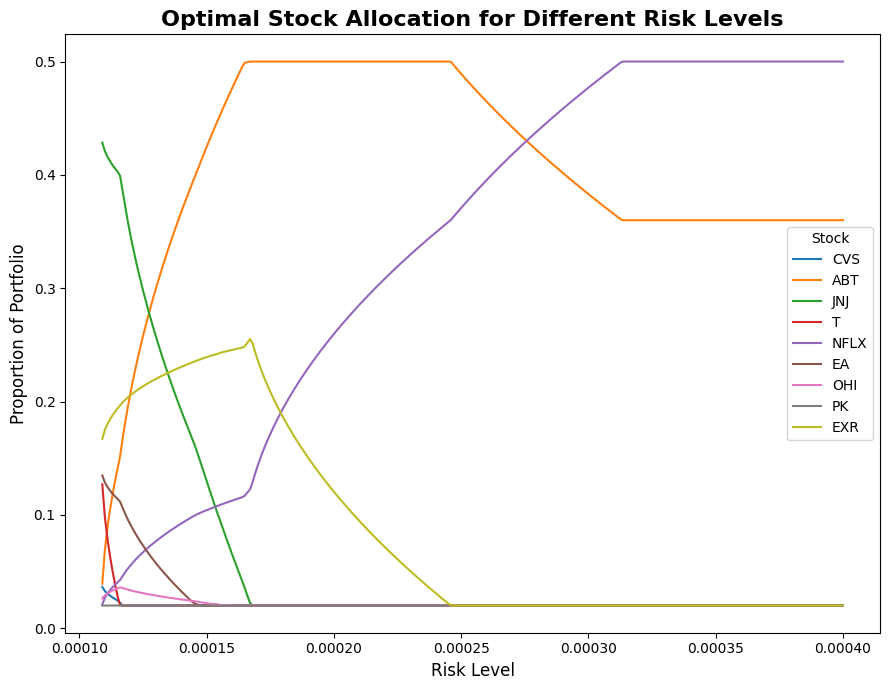

In [31]:
# Generate the dataframe for proportions of the portfolio for each risk limit
param_analysis_df = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis_df.columns = pd.Index(stock_names)

# Plot the optimal stock allocations for different risk levels
param_analysis_df.plot(figsize=(9,7))

# Add title and labels
plt.title('Optimal Stock Allocation for Different Risk Levels',fontsize=16, fontweight='bold')
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Proportion of Portfolio',fontsize=12)

# Add legend
plt.legend(title='Stock',fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## 2.9 Efficient Frontier

In [32]:
# Extract risk levels from the 'returns' dictionary and convert to a list
risk = list(returns.keys())
print("Risk Levels:", risk)

# Extract portfolio returns from the 'returns' dictionary and convert to a list
reward = list(returns.values())
print("Portfolio Returns:", reward)

Risk Levels: [0.00010899999999999998, 0.00010999999999999998, 0.00011099999999999997, 0.00011199999999999997, 0.00011299999999999997, 0.00011399999999999997, 0.00011499999999999996, 0.00011599999999999996, 0.00011699999999999996, 0.00011799999999999995, 0.00011899999999999995, 0.00011999999999999995, 0.00012099999999999995, 0.00012199999999999994, 0.00012299999999999995, 0.00012399999999999992, 0.00012499999999999995, 0.00012599999999999992, 0.00012699999999999994, 0.0001279999999999999, 0.00012899999999999994, 0.0001299999999999999, 0.00013099999999999993, 0.0001319999999999999, 0.00013299999999999993, 0.0001339999999999999, 0.00013499999999999992, 0.0001359999999999999, 0.00013699999999999991, 0.00013799999999999988, 0.0001389999999999999, 0.00013999999999999988, 0.0001409999999999999, 0.00014199999999999987, 0.0001429999999999999, 0.00014399999999999987, 0.0001449999999999999, 0.00014599999999999986, 0.0001469999999999999, 0.00014799999999999986, 0.00014899999999999988, 0.0001499999

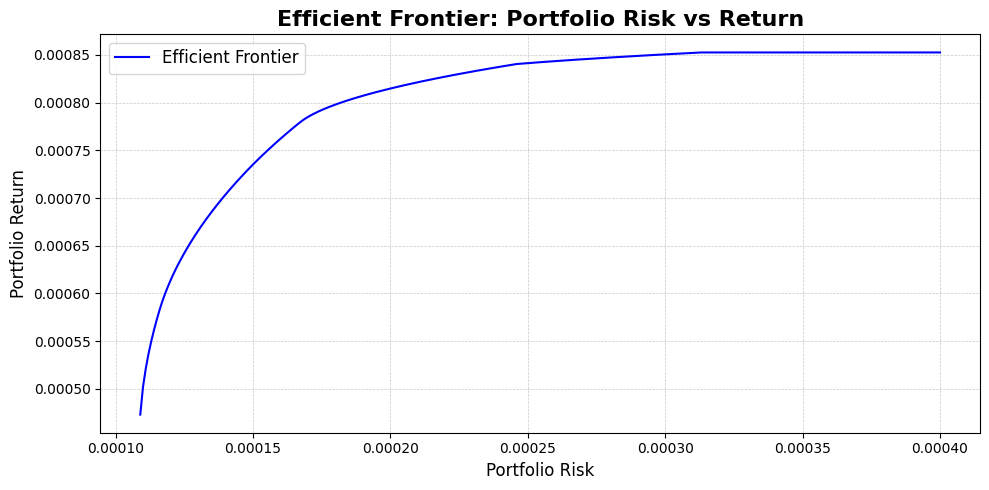

In [33]:
# Plot the Efficient Frontier
plt.figure(figsize=(10,5))
plt.plot(risk, reward,color='b', label='Efficient Frontier')

# Add title and labels
plt.title('Efficient Frontier: Portfolio Risk vs Return', fontsize=16, fontweight='bold')
plt.xlabel('Portfolio Risk', fontsize=12)
plt.ylabel('Portfolio Return', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12, loc='best')

# Show the plot
plt.tight_layout()
plt.show()

## 2.10 Choosing Risk Level

In [34]:
# Choose the desired risk level
chosen_risk_level = 0.00036

# Find the closest match for the risk level in the index
matched_risk_level = param_analysis_df.index[np.isclose(param_analysis_df.index, chosen_risk_level)][0]

# Fetch the portfolio proportions for the matched risk level
portfolio_proportions = param_analysis_df.loc[matched_risk_level]

# Convert to a dictionary
allocation_dict = portfolio_proportions.to_dict()

print("Portfolio Proportions at choosen Risk Level", matched_risk_level, ":", allocation_dict)

Portfolio Proportions at choosen Risk Level 0.00035999999999999926 : {'CVS': 0.02000000884295707, 'ABT': 0.3600000073279516, 'JNJ': 0.020000012758941657, 'T': 0.02000000200391244, 'NFLX': 0.4999998948317003, 'EA': 0.020000012978322032, 'OHI': 0.02000001766702141, 'PK': 0.020000004032734196, 'EXR': 0.020000039556459334}


# **3. Investment Strategies**

In [35]:
# Downloading 2023 data
initial_investment = 100000

# Pull historical price data for each stock with daily data for 2023
dow_prices_2023 = {ticker: si.get_data(ticker, start_date='01/01/2023', end_date='12/31/2023', interval='1d') for ticker in tickers_list}

# Prepare data frame with adjusted closing prices for all stocks
daily_prices = pd.DataFrame(dow_prices_2023['CVS']['adjclose']).rename(columns={"adjclose": "CVS"})
for i in tickers_list[1:]:
    daily_prices[i] = pd.DataFrame(dow_prices_2023[i]['adjclose'])

# Display the combined DataFrame
daily_prices

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
2023-01-03,86.389717,105.328896,167.634888,16.536346,294.950012,121.411041,23.636848,9.522933,133.908371
2023-01-04,85.524986,106.895668,169.459991,16.889313,309.410004,123.596031,23.907372,9.713225,134.075424
2023-01-05,84.102333,106.501564,168.208771,16.951078,309.700012,123.269775,23.907372,9.390554,130.892181
2023-01-06,85.171631,107.972206,169.572845,17.233452,315.549988,122.488708,24.228615,9.878696,133.639236
2023-01-09,85.069359,107.799187,165.179474,17.043680,315.170013,122.765556,23.898918,9.845605,136.701813
...,...,...,...,...,...,...,...,...,...
2023-12-22,75.597672,106.896759,150.689331,15.584899,486.760010,136.956024,28.373510,14.483044,151.847076
2023-12-26,75.828033,107.092850,151.348450,15.603733,491.190002,136.577972,28.160938,14.775109,154.669846
2023-12-27,75.655258,107.641884,151.552017,15.613149,491.790009,136.001022,28.456690,14.835240,156.260666
2023-12-28,75.799240,108.239944,151.774948,15.763820,490.510010,136.050735,28.706226,14.644677,157.298599


In [36]:
# Check for missing values in the data
print(daily_prices.isnull().sum())

# As we don't have any missing values, we are good to go.

CVS     0
ABT     0
JNJ     0
T       0
NFLX    0
EA      0
OHI     0
PK      0
EXR     0
dtype: int64


In [37]:
# Extract initial stock prices (first trading day)
initial_prices = daily_prices.iloc[0]  # Assuming the first row is the first trading day
initial_prices

,2023-01-03
CVS,86.389717
ABT,105.328896
JNJ,167.634888
T,16.536346
NFLX,294.950012
EA,121.411041
OHI,23.636848
PK,9.522933
EXR,133.908371


## 3.1 Buy-and-Hold Strategy (No Rebalance)

### A) Amount of money invested in each stock of the portfolio

In [38]:
# Calculate the total amount to invest
total_investment = 100000

# Calculate the amount invested in each stock based on MPT allocation
investment_amounts = portfolio_proportions * total_investment

# Only consider stocks with nonzero allocation
investment_amounts = investment_amounts[investment_amounts > 0]

# Print the investment amounts for each stock
print("Investment amounts based on MPT allocation:\n")
print(investment_amounts)

Investment amounts based on MPT allocation:

CVS      2000.000884
ABT     36000.000733
JNJ      2000.001276
T        2000.000200
NFLX    49999.989483
EA       2000.001298
OHI      2000.001767
PK       2000.000403
EXR      2000.003956
Name: 0.00035999999999999926, dtype: float64


In [39]:
# Calculate the number of shares for each stock
shares = {stock: investment_amounts[stock] / initial_prices[stock] for stock in investment_amounts.index}

# Print the number of shares purchased
print("Number of Shares Purchased:")
for stock, num_shares in shares.items():
    print(f"{stock}: {round(num_shares, 2)} shares")

Number of Shares Purchased:
CVS: 23.15 shares
ABT: 341.79 shares
JNJ: 11.93 shares
T: 120.95 shares
NFLX: 169.52 shares
EA: 16.47 shares
OHI: 84.61 shares
PK: 210.02 shares
EXR: 14.94 shares


In [40]:
# Resample the data to get the last trading day of each month
monthly_prices = daily_prices.resample('ME').last()
monthly_prices

,CVS,ABT,JNJ,T,NFLX,EA,OHI,PK,EXR
2023-01-31,82.595413,106.742401,153.739777,18.234232,353.859985,127.224525,24.888014,12.170490,146.474167
2023-02-28,78.213783,98.216515,145.218628,16.927309,322.130005,109.873100,23.165108,11.376223,152.803467
2023-03-31,69.572250,97.772362,146.867340,17.231663,345.480011,119.291634,23.701218,10.357745,152.777756
2023-04-30,69.200180,107.198212,155.110870,16.041647,329.929993,126.055969,23.724417,10.097964,142.566315
2023-05-31,64.216171,98.979065,148.032745,14.280425,395.230011,126.959267,26.428432,10.843787,135.280472
2023-06-30,65.254501,105.791153,158.018707,14.480152,440.489990,128.645447,27.208607,10.875751,141.142395
2023-07-31,71.080978,108.550858,159.937607,13.416960,438.970001,135.241379,28.883078,11.562907,133.228409
2023-08-31,62.020977,100.331284,155.473389,13.666450,433.679993,119.192390,28.810644,10.884234,122.833206
2023-09-30,66.446289,94.432320,149.771042,13.878978,377.600006,119.609627,30.023914,10.583099,116.626556
2023-10-31,66.239151,92.700066,142.645493,14.501960,411.690002,122.977371,30.591631,9.904475,99.369499


### B) Aggregate Value of Entire Portfolio, C) Percentual Return of Each Stock & D) Percentual Return of the Entire Portfolio On last trading day of each month

In [41]:
# Filter stocks with non-zero allocation
buy_hold_allocation = {stock: proportion for stock, proportion in allocation_dict.items() if proportion > 0}

# Initialize an empty list to store Buy-and-Hold portfolio performance data
buy_hold_portfolio_values = []

# Loop through each row in the monthly prices DataFrame
for date, price_row in monthly_prices.iterrows():

    # Calculate the value of each stock in the Buy-and-Hold portfolio
    buy_hold_stock_values = {stock: shares[stock] * price_row[stock] for stock in shares}

    total_buy_hold_portfolio_value = sum(list(buy_hold_stock_values.values()))  # Aggregate portfolio value

    # Calculate individual stock returns for Buy-and-Hold
    buy_hold_stock_returns = {stock: ((price_row[stock] / initial_prices[stock]) - 1) * 100 for stock in shares}

    # Calculate overall portfolio return for Buy-and-Hold
    total_buy_hold_portfolio_return = ((total_buy_hold_portfolio_value / initial_investment) - 1) * 100

    # Append results to the Buy-and-Hold portfolio values list
    buy_hold_portfolio_values.append({
        'Date': date,
        'Portfolio Value': round(total_buy_hold_portfolio_value, 2),
        'Portfolio Return (%)': round(total_buy_hold_portfolio_return, 2),
        **{f"{stock} Value": round(value, 2) for stock, value in buy_hold_stock_values.items()},
        **{f"{stock} Return (%)": round(ret, 2) for stock, ret in buy_hold_stock_returns.items()},
    })

# Convert the Buy-and-Hold portfolio values list to a DataFrame
buy_hold_performance_df = pd.DataFrame(buy_hold_portfolio_values)

# Reorder columns for better readability in the Buy-and-Hold DataFrame
buy_hold_column_order = ['Date', 'Portfolio Value', 'Portfolio Return (%)'] + \
                        [f"{stock} Value" for stock in shares] + \
                        [f"{stock} Return (%)" for stock in shares]
buy_hold_performance_df = buy_hold_performance_df[buy_hold_column_order]

# Display the Buy-and-Hold strategy DataFrame
print("Buy-and-Hold Strategy: Monthly Portfolio Performance")
buy_hold_performance_df

Buy-and-Hold Strategy: Monthly Portfolio Performance


,Date,Portfolio Value,Portfolio Return (%),CVS Value,ABT Value,JNJ Value,T Value,NFLX Value,EA Value,OHI Value,...,EXR Value,CVS Return (%),ABT Return (%),JNJ Return (%),T Return (%),NFLX Return (%),EA Return (%),OHI Return (%),PK Return (%),EXR Return (%)
0,2023-01-31,111366.63,11.37,1912.16,36483.12,1834.22,2205.35,59986.42,2095.77,2105.87,...,2187.68,-4.39,1.34,-8.29,10.27,19.97,4.79,5.29,27.80,9.38
1,2023-02-28,102208.66,2.21,1810.72,33569.08,1732.56,2047.29,54607.55,1809.94,1960.09,...,2282.21,-9.46,-6.75,-13.37,2.36,9.22,-9.50,-2.00,19.46,14.11
2,2023-03-31,105857.81,5.86,1610.66,33417.28,1752.23,2084.10,58565.85,1965.09,2005.45,...,2281.83,-19.47,-7.17,-12.39,4.20,17.13,-1.75,0.27,8.77,14.09
3,2023-04-30,106295.52,6.30,1602.05,36638.91,1850.58,1940.17,55929.80,2076.52,2007.41,...,2129.32,-19.90,1.77,-7.47,-2.99,11.86,3.83,0.37,6.04,6.47
4,2023-05-31,114434.65,14.43,1486.66,33829.71,1766.13,1727.16,66999.48,2091.40,2236.21,...,2020.50,-25.67,-6.03,-11.69,-13.64,34.00,4.57,11.81,13.87,1.02
5,2023-06-30,124790.80,24.79,1510.70,36157.99,1885.27,1751.31,74671.96,2119.17,2302.22,...,2108.05,-24.46,0.44,-5.74,-12.43,49.34,5.96,15.11,14.21,5.40
6,2023-07-31,125782.01,25.78,1645.59,37101.22,1908.17,1622.72,74414.29,2227.83,2443.90,...,1989.85,-17.72,3.06,-4.59,-18.86,48.83,11.39,22.20,21.42,-0.51
7,2023-08-31,121274.78,21.27,1435.84,34291.88,1854.91,1652.90,73517.53,1963.45,2437.78,...,1834.59,-28.21,-4.74,-7.25,-17.36,47.04,-1.83,21.89,14.29,-8.27
8,2023-09-30,109765.61,9.77,1538.29,32275.70,1786.87,1678.60,64010.83,1970.33,2540.44,...,1741.89,-23.09,-10.35,-10.66,-16.07,28.02,-1.48,27.02,11.13,-12.91
9,2023-10-31,114641.27,14.64,1533.50,31683.64,1701.86,1753.95,69789.78,2025.80,2588.47,...,1484.14,-23.33,-11.99,-14.91,-12.30,39.58,1.29,29.42,4.01,-25.79


## 3.2 Rebalancing Strategies

### 3.2.1 Daily rebalancing

In [42]:
# Initialize an empty list to store portfolio performance data
daily_portfolio_values = []

# Initialize shares based on the original allocation
initial_investment = 100000
initial_prices = daily_prices.iloc[0]  # Initial prices on day 1
previous_prices= initial_prices
previous_investment = initial_investment

# Loop through each row in the daily prices DataFrame
for date, row in daily_prices.iterrows():

    # Rebalance the portfolio by selling all stocks and buying them again using the original allocation
    investment_amounts = {stock: allocation_dict[stock] * previous_investment for stock in allocation_dict}
    shares = {stock: investment_amounts[stock] / previous_prices[stock] for stock in allocation_dict}
    stock_values = {stock: shares[stock] * row[stock] for stock in shares}
    portfolio_value = sum(list(stock_values.values()))  # Aggregate portfolio value

    # Calculate individual stock returns
    stock_returns = {stock: ((row[stock] / initial_prices[stock]) - 1) * 100 for stock in shares}

    # Calculate overall portfolio return
    portfolio_return = ((portfolio_value / initial_investment) - 1) * 100

    # Append results to the list
    daily_portfolio_values.append({
        'Date': date,
        'Portfolio Value': round(portfolio_value, 2),
        'Portfolio Return (%)': round(portfolio_return, 2),
        **{f"{stock} Value": round(value, 2) for stock, value in stock_values.items()},
        **{f"{stock} Return (%)": round(ret, 2) for stock, ret in stock_returns.items()},
    })
    previous_prices = row  # Update initial prices for the next day
    previous_investment = portfolio_value  # Update initial investment for the next day

# Convert to a DataFrame for visualization
daily_performance_df = pd.DataFrame(daily_portfolio_values)

# Reorder columns for better readability
column_order = ['Date', 'Portfolio Value', 'Portfolio Return (%)'] + \
               [f"{stock} Value" for stock in shares] + \
               [f"{stock} Return (%)" for stock in shares]
daily_performance_df = daily_performance_df[column_order]

# Display the DataFrame
print("Daily Rebalanced Portfolio Performance:")
daily_performance_df

Daily Rebalanced Portfolio Performance:


,Date,Portfolio Value,Portfolio Return (%),CVS Value,ABT Value,JNJ Value,T Value,NFLX Value,EA Value,OHI Value,...,EXR Value,CVS Return (%),ABT Return (%),JNJ Return (%),T Return (%),NFLX Return (%),EA Return (%),OHI Return (%),PK Return (%),EXR Return (%)
0,2023-01-03,100000.00,0.00,2000.00,36000.00,2000.00,2000.00,49999.99,2000.00,2000.00,...,2000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2023-01-04,103132.55,3.13,1979.98,36535.50,2021.78,2042.69,52451.25,2035.99,2022.89,...,2002.50,-1.00,1.49,1.09,2.13,4.90,1.80,1.14,2.00,0.12
2,2023-01-05,102879.07,2.88,2028.34,36990.84,2047.42,2070.19,51614.60,2057.21,2062.65,...,2013.68,-2.65,1.11,0.34,2.51,5.00,1.53,1.14,-1.39,-2.25
3,2023-01-06,104604.01,4.60,2083.74,37547.89,2074.27,2091.86,52411.17,2044.55,2085.23,...,2100.77,-1.41,2.51,1.16,4.22,6.98,0.89,2.50,3.74,-0.20
4,2023-01-09,104418.13,4.42,2089.57,37597.10,2037.88,2069.04,52239.01,2096.81,2063.61,...,2140.03,-1.53,2.35,-1.46,3.07,6.86,1.12,1.11,3.39,2.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22,133677.57,33.68,2685.44,48496.62,2691.40,2690.42,66355.47,2676.58,2678.92,...,2688.23,-12.49,1.49,-10.11,-5.75,65.03,12.80,20.04,52.09,13.40
246,2023-12-26,134473.42,34.47,2681.70,48212.20,2685.25,2676.78,67447.07,2666.17,2653.52,...,2723.26,-12.23,1.67,-9.72,-5.64,66.53,12.49,19.14,55.15,15.50
247,2023-12-27,134858.34,34.86,2683.34,48658.62,2693.09,2691.09,67318.83,2678.11,2717.72,...,2717.14,-12.43,2.20,-9.59,-5.58,66.74,12.02,20.39,55.78,16.69
248,2023-12-28,134995.62,35.00,2702.30,48818.74,2701.14,2723.20,67253.66,2698.15,2720.82,...,2715.09,-12.26,2.76,-9.46,-4.67,66.30,12.06,21.45,53.78,17.47


### 3.2.2 Weekly rebalancing

In [43]:
# Initialize an empty list to store portfolio performance data
weekly_portfolio_values = []

# Initialize shares based on the original allocation
initial_investment = 100000
initial_prices = daily_prices.iloc[0]  # Initial prices on day 1
previous_prices = initial_prices
previous_investment = initial_investment

# To keep track of weekly data
weekly_start_date = daily_prices.index[0]  # First date (could adjust to the first week if necessary)

# Loop through each row in the daily prices DataFrame
for date, row in daily_prices.iterrows():
    # Check if it's the first day of the week (Monday), and update previous_prices
    if date.weekday() == 0:  # Monday
        previous_prices = row  # Set prices on Monday

    # Check if it's the last day of the week (Friday)
    if date.weekday() == 4:  # Friday

        # Rebalance the portfolio by selling all stocks and buying them again using the original allocation
        investment_amounts = {stock: allocation_dict[stock] * previous_investment for stock in allocation_dict}
        shares = {stock: investment_amounts[stock] / previous_prices[stock] for stock in allocation_dict}

        # Calculate stock values for the week (using Friday's prices)
        stock_values = {stock: shares[stock] * row[stock] for stock in shares}
        portfolio_value = sum(list(stock_values.values())) # Aggregate portfolio value

        # Calculate individual stock returns for the week (using Monday's price as the start)
        stock_returns = {stock: ((row[stock] / previous_prices[stock]) - 1) * 100 for stock in shares}

        # Calculate overall portfolio return for the week
        portfolio_return = ((portfolio_value / initial_investment) - 1) * 100

        # Append results to the list
        weekly_portfolio_values.append({
            'Date': date,
            'Portfolio Value': round(portfolio_value, 2),
            'Portfolio Return (%)': round(portfolio_return, 2),
            **{f"{stock} Value": round(value, 2) for stock, value in stock_values.items()},
            **{f"{stock} Return (%)": round(ret, 2) for stock, ret in stock_returns.items()},
        })

        # Update previous investment for the next week (this will be the portfolio value after rebalance)
        previous_investment = portfolio_value  # Update investment for the next week

# Convert to a DataFrame for visualization
weekly_performance_df = pd.DataFrame(weekly_portfolio_values)

# Reorder columns for better readability, ensure shares list is correctly used
column_order = ['Date', 'Portfolio Value', 'Portfolio Return (%)'] + \
               [f"{stock} Value" for stock in allocation_dict] + \
               [f"{stock} Return (%)" for stock in allocation_dict]
weekly_performance_df = weekly_performance_df[column_order]

# Display the DataFrame
print("Weekly Rebalanced Portfolio Performance:")
weekly_performance_df

Weekly Rebalanced Portfolio Performance:


,Date,Portfolio Value,Portfolio Return (%),CVS Value,ABT Value,JNJ Value,T Value,NFLX Value,EA Value,OHI Value,...,EXR Value,CVS Return (%),ABT Return (%),JNJ Return (%),T Return (%),NFLX Return (%),EA Return (%),OHI Return (%),PK Return (%),EXR Return (%)
0,2023-01-06,104613.32,4.61,1971.80,36903.45,2023.12,2084.31,53492.10,2017.75,2050.07,...,1995.98,-1.41,2.51,1.16,4.22,6.98,0.89,2.50,3.74,-0.20
1,2023-01-13,108358.67,8.36,2056.36,38290.08,2066.65,2148.31,55235.90,2114.00,2079.69,...,2157.61,-1.72,1.67,-1.22,2.68,5.60,1.04,-0.60,5.63,3.12
2,2023-01-20,113576.08,13.58,2075.05,39419.85,2082.75,2188.80,58877.49,2198.94,2161.81,...,2220.29,-4.25,1.05,-3.90,1.00,8.67,1.47,-0.25,8.49,2.45
3,2023-01-27,113098.61,13.10,2286.63,39431.35,2270.44,2372.61,57320.28,2297.55,2300.02,...,2366.27,0.67,-3.56,-0.05,4.45,0.94,1.15,1.25,8.01,4.17
4,2023-02-03,115847.32,15.85,2228.71,41449.65,2298.42,2224.95,58597.57,1997.71,2284.22,...,2411.74,-1.47,1.80,1.61,-1.64,3.62,-11.68,0.98,4.08,6.62
5,2023-02-10,112501.07,12.50,2436.80,40729.72,2299.79,2256.60,55661.05,2308.89,2282.90,...,2230.89,5.17,-2.34,-0.74,-2.60,-3.91,-0.35,-1.47,-0.97,-3.71
6,2023-02-17,109951.98,9.95,2217.73,39836.08,2233.34,2271.05,54586.08,2226.17,2220.91,...,2195.62,-1.44,-1.64,-0.74,0.93,-2.96,-1.06,-1.29,-3.78,-2.42
7,2023-02-24,100200.89,0.20,2098.72,36642.83,2122.59,2196.76,48625.46,2132.41,2069.87,...,2170.16,-4.56,-7.43,-3.48,-0.10,-11.55,-3.03,-5.87,-2.59,-1.31
8,2023-03-03,100701.82,0.70,1932.45,37764.40,1983.29,1980.85,48882.94,2044.68,2009.96,...,2093.53,-3.57,4.69,-1.03,-1.16,-2.43,2.03,0.30,0.29,4.47
9,2023-03-10,94846.61,-5.15,1871.55,34209.80,1962.90,1977.55,47241.38,1942.86,2016.98,...,1848.84,-7.07,-5.64,-2.54,-1.81,-6.18,-3.53,0.15,-11.88,-8.20


### 3.2.3 Monthly rebalancing

In [44]:
# Initialize an empty list to store portfolio performance data
monthly_portfolio_values = []

# Initialize shares based on the original allocation
initial_investment = 100000
initial_prices = daily_prices.iloc[0]  # Initial prices on day 1
previous_prices = initial_prices
previous_investment = initial_investment

# Resample to find the first and last trading day of each month
monthly_first_trading_days = daily_prices.resample('MS').first()  # First trading day of each month
monthly_last_trading_days = daily_prices.resample('M').last()     # Last trading day of each month

# Loop through each month
for month_start, month_end in zip(monthly_first_trading_days.index, monthly_last_trading_days.index):
    # Get prices for the first and last trading day of the month
    start_prices = monthly_first_trading_days.loc[month_start]
    end_prices = monthly_last_trading_days.loc[month_end]

    # Rebalance the portfolio by selling all stocks and buying them again using the original allocation
    investment_amounts = {stock: allocation_dict[stock] * previous_investment for stock in allocation_dict}
    shares = {stock: investment_amounts[stock] / start_prices[stock] for stock in allocation_dict}

    # Calculate stock values for the month (using the last trading day's prices)
    stock_values = {stock: shares[stock] * end_prices[stock] for stock in shares}
    portfolio_value = sum(list(stock_values.values())) # Aggregate portfolio value

    # Calculate individual stock returns for the month (using the first trading day's price as the start)
    stock_returns = {stock: ((end_prices[stock] / start_prices[stock]) - 1) * 100 for stock in shares}

    # Calculate overall portfolio return for the month
    portfolio_return = ((portfolio_value / initial_investment) - 1) * 100

    # Append results to the list
    monthly_portfolio_values.append({
        'Date': month_end,
        'Portfolio Value': round(portfolio_value, 2),
        'Portfolio Return (%)': round(portfolio_return, 2),
        **{f"{stock} Value": round(value, 2) for stock, value in stock_values.items()},
        **{f"{stock} Return (%)": round(ret, 2) for stock, ret in stock_returns.items()},
    })

    # Update previous investment for the next month (this will be the portfolio value after rebalance)
    previous_investment = portfolio_value  # Update investment for the next month

# Convert to a DataFrame for visualization
monthly_performance_df = pd.DataFrame(monthly_portfolio_values)

# Reorder columns for better readability
column_order = ['Date', 'Portfolio Value', 'Portfolio Return (%)'] + \
               [f"{stock} Value" for stock in allocation_dict] + \
               [f"{stock} Return (%)" for stock in allocation_dict]
monthly_performance_df = monthly_performance_df[column_order]

# Display the DataFrame
print("Monthly Rebalanced Portfolio Performance:")
monthly_performance_df

Monthly Rebalanced Portfolio Performance:


<ipython-input-44-d9105ee7c898>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_last_trading_days = daily_prices.resample('M').last()     # Last trading day of each month


,Date,Portfolio Value,Portfolio Return (%),CVS Value,ABT Value,JNJ Value,T Value,NFLX Value,EA Value,OHI Value,...,EXR Value,CVS Return (%),ABT Return (%),JNJ Return (%),T Return (%),NFLX Return (%),EA Return (%),OHI Return (%),PK Return (%),EXR Return (%)
0,2023-01-31,111366.63,11.37,1912.16,36483.12,1834.22,2205.35,59986.42,2095.77,2105.87,...,2187.68,-4.39,1.34,-8.29,10.27,19.97,4.79,5.29,27.80,9.38
1,2023-02-28,100873.54,0.87,2126.77,36470.73,2084.75,2087.16,49551.82,2119.94,2077.38,...,2314.64,-4.51,-9.03,-6.40,-6.29,-11.01,-4.82,-6.73,-8.39,3.92
2,2023-03-31,106112.45,6.11,1817.85,36469.34,2049.60,2081.26,55585.34,2200.93,2073.45,...,2029.34,-9.89,0.43,1.59,3.16,10.21,9.09,2.77,-10.51,0.59
3,2023-04-30,106822.96,6.82,2061.52,41747.19,2214.93,1961.42,50260.81,2225.96,2173.49,...,2088.33,-2.86,9.28,4.37,-7.58,-5.27,4.89,2.41,-1.55,-1.60
4,2023-05-31,115160.83,15.16,1967.02,35303.21,2040.21,1920.37,65129.63,2149.41,2380.86,...,2022.49,-7.93,-8.20,-4.50,-10.11,21.94,0.61,11.44,5.20,-5.33
5,2023-06-30,123429.06,23.43,2311.58,43957.79,2466.86,2323.61,62916.65,2339.47,2393.69,...,2418.28,0.36,6.03,7.10,0.89,9.27,1.57,3.93,-0.09,5.00
6,2023-07-31,125214.14,25.21,2664.33,46359.02,2531.75,2263.21,61369.20,2571.95,2617.09,...,2305.85,7.93,4.33,2.56,-8.32,-0.56,4.19,6.02,2.56,-6.59
7,2023-08-31,120527.94,20.53,2206.95,41965.37,2414.78,2590.09,61901.94,2210.83,2515.35,...,2342.63,-11.87,-6.90,-3.57,3.43,-1.13,-11.72,0.44,-4.96,-6.46
8,2023-09-30,109451.87,9.45,2562.89,40858.80,2339.51,2471.44,51731.54,2407.76,2444.47,...,2286.10,6.32,-5.83,-2.95,2.53,-14.16,-0.12,1.41,-2.54,-5.16
9,2023-10-31,113489.75,13.49,2186.29,39132.42,2092.96,2341.87,59238.34,2255.36,2267.35,...,1901.26,-0.13,-0.69,-4.39,6.98,8.25,3.03,3.58,-5.26,-13.15


## 3.3 Performance Plot

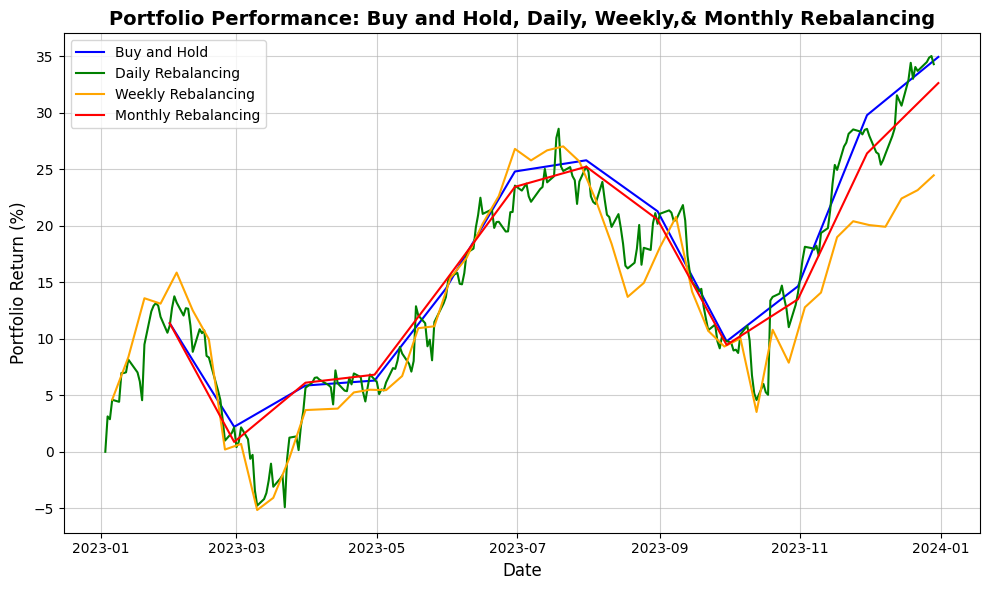

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Date and Portfolio Return for each strategy
buy_and_hold_returns = buy_hold_performance_df[['Date', 'Portfolio Return (%)']]
daily_returns = daily_performance_df[['Date', 'Portfolio Return (%)']]
weekly_returns = weekly_performance_df[['Date', 'Portfolio Return (%)']]
monthly_returns = monthly_performance_df[['Date', 'Portfolio Return (%)']]

# Plot the data
plt.figure(figsize=(10, 6))

# Plot buy and hold returns
plt.plot(buy_and_hold_returns['Date'], buy_and_hold_returns['Portfolio Return (%)'], label='Buy and Hold', color='blue')

# Plot daily rebalancing returns
plt.plot(daily_returns['Date'], daily_returns['Portfolio Return (%)'], label='Daily Rebalancing', color='green')

# Plot weekly rebalancing returns
plt.plot(weekly_returns['Date'], weekly_returns['Portfolio Return (%)'], label='Weekly Rebalancing', color= 'orange')

# Plot monthly rebalancing returns
plt.plot(monthly_returns['Date'], monthly_returns['Portfolio Return (%)'], label='Monthly Rebalancing', color= 'red')

# Add title and labels
plt.title("Portfolio Performance: Buy and Hold, Daily, Weekly,& Monthly Rebalancing", fontsize=14, fontweight= 'bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Return (%)", fontsize=12)

# Add legend
plt.legend(fontsize=10, loc='upper left')

# Grid for better readability
plt.grid(visible=True, alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# Observations:
# Buy and Hold strategy is the most profitable over the entire period, showing consistent and strong growth.
# Daily Rebalancing provides high volatility but ends with a solid return, though slightly less than Buy and Hold.
# Weekly Rebalancing and Monthly Rebalancing are less profitable, with lower returns by the end of the period.

# In summary, Buy and Hold is the most profitable strategy, with Daily Rebalancing performing well but with more volatility.


# **4. Monte Carlo Analysis**

<ipython-input-46-a3647a66a0ff>:48: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulated_results_v2["Annual Return"], shade=True)


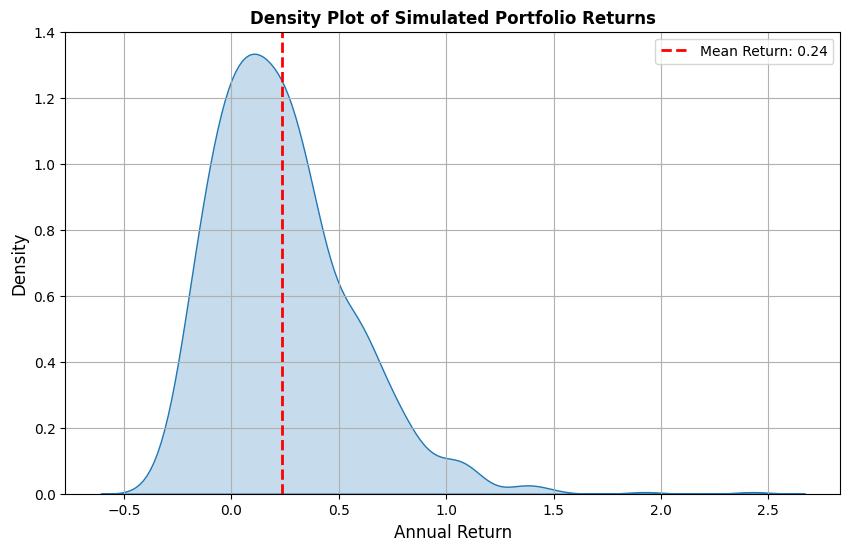

Probability of losing money: 24.90%
Mean return: 0.24


In [46]:
# Filter out stocks with 0 allocation
filtered_proportions = portfolio_proportions[portfolio_proportions > 0]

# Ensure alignment between filtered_proportions and pre-calculated return stats
common_stocks = filtered_proportions.index.intersection(Avg_Return.index)
filtered_proportions = filtered_proportions[common_stocks]
filtered_avg_return = Avg_Return.loc[common_stocks]["Avg_Return"]
filtered_std_dev = Std_Dev_Return.loc[common_stocks]["Std_Dev_Return"]

# Monte Carlo simulation function
def monte_carlo_with_allocation_v2(filtered_proportions, filtered_avg_return, filtered_std_dev, simulations=1000, trading_days=252):
    """
    Perform Monte Carlo simulation using specified portfolio allocation and pre-calculated return statistics.

    Args:
        filtered_proportions (Series): Allocation for each stock.
        filtered_avg_return (Series): Average return for each stock.
        filtered_std_dev (Series): Standard deviation (volatility) for each stock.
        simulations (int): Number of simulations to run (default: 1000).
        trading_days (int): Number of trading days in a year (default: 252).

    Returns:
        DataFrame: Simulated portfolio returns.
    """
    # Simulate portfolio performance
    simulated_annual_returns = []
    for _ in range(simulations):
        portfolio_return = 0
        for stock, allocation in filtered_proportions.items():
            mu = filtered_avg_return[stock]
            sigma = filtered_std_dev[stock]
            # Generate random daily returns for the stock
            simulated_daily_returns = np.random.normal(mu, sigma, trading_days)
            # Calculate annual return for the stock
            simulated_annual_return = np.prod(1 + simulated_daily_returns) - 1
            # Add weighted return to portfolio return
            portfolio_return += simulated_annual_return * allocation
        simulated_annual_returns.append(portfolio_return)

    # Convert to DataFrame
    return pd.DataFrame(simulated_annual_returns, columns=["Annual Return"])

# Perform Monte Carlo simulation using pre-calculated stats
simulated_results_v2 = monte_carlo_with_allocation_v2(filtered_proportions, filtered_avg_return, filtered_std_dev)

# Plot the results
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_results_v2["Annual Return"], shade=True)
plt.axvline(simulated_results_v2["Annual Return"].mean(), color='r', linestyle='dashed', linewidth=2,
            label=f'Mean Return: {simulated_results_v2["Annual Return"].mean():.2f}')

# Add title and labels
plt.title("Density Plot of Simulated Portfolio Returns", fontweight='bold')
plt.xlabel("Annual Return", fontsize= 12)
plt.ylabel("Density",fontsize= 12 )
plt.legend()
plt.grid(True)
plt.show()

# Report probability of losing money
probability_of_loss_v2 = (simulated_results_v2["Annual Return"] < 0).mean() * 100
print(f"Probability of losing money: {probability_of_loss_v2:.2f}%")
print(f"Mean return: {simulated_results_v2['Annual Return'].mean():.2f}")

Probability of losing money: 24.90%

# **5. Conclusion**

**Key Insights from the Project:**

Balancing Risk and Return: The Modern Portfolio Theory (MPT) showed how portfolios could be optimized to balance risk and return effectively, giving us a practical framework for smarter investment decisions.

Power of Diversification: Allocating across different sectors helped us understand how diversification reduces risk and enhances portfolio stability, even during volatile market conditions.

Learning Through Collaboration: Working together taught us the value of teamwork, as each member’s unique contributions made the project more insightful and impactful.

Real-World Relevance: This project gave us hands-on experience with models and strategies that are directly applicable to real-life investment challenges, bridging theory and practice seamlessly.

**Contribution:**

We both team members contributed to all part of the project as we used to do in person meetings. Below are the main part we focused on but are not limited to.

---


Priyanka Garg: Conducted rebalancing strategies, created performance comparison plots, analyzed Monte Carlo simulation results, and compiled the final report.

Estimated time spent: ~25 hours.




---


Yash Parihar: Responsible for data retrieval, cleaning, exploratory data analysis, and implementing the MPT optimization model.

Estimated time spent: ~22 hours.



---

